## Import Data ##

In [372]:
import pandas as pd
import numpy as np
from scipy.stats import *

data = pd.read_csv("bank.csv")
df = data

In [374]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [376]:
from sklearn.preprocessing import LabelEncoder

#Words to numbers
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == "object":
        df[column] = le.fit_transform(df[column])

In [378]:
X = df.drop(columns=["deposit"])
y = df["deposit"]

In [380]:
df = df.drop(columns=["default"])

In [382]:
df

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,1,0,8,8,9,2,172,5,0,0


## Data Clean Up ##

In [112]:
stats.zscore(df) #Find outliers

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1.491505,-1.391604,-0.318672,-0.380501,0.252525,1.055280,-0.387923,1.844786,-1.265746,0.800268,1.930226,-0.554168,-0.481184,-0.363260,0.520705,1.053764
1,1.239676,-1.391604,-0.318672,-0.380501,-0.459974,-0.947616,-0.387923,1.844786,-1.265746,0.800268,3.154612,-0.554168,-0.481184,-0.363260,0.520705,1.053764
2,-0.019470,1.399105,-0.318672,-0.380501,-0.080160,1.055280,-0.387923,1.844786,-1.265746,0.800268,2.929901,-0.554168,-0.481184,-0.363260,0.520705,1.053764
3,1.155733,0.778947,-0.318672,-0.380501,0.293762,1.055280,-0.387923,1.844786,-1.265746,0.800268,0.596366,-0.554168,-0.481184,-0.363260,0.520705,1.053764
4,1.071790,-1.391604,-0.318672,0.953822,-0.416876,-0.947616,-0.387923,1.844786,-1.265746,0.800268,0.867171,-0.186785,-0.481184,-0.363260,0.520705,1.053764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.691015,-1.081525,1.279987,-1.714823,-0.473616,1.055280,-0.387923,-0.598149,0.515650,-1.706158,-0.331287,-0.554168,-0.481184,-0.363260,0.520705,-0.948979
11158,-0.187357,0.778947,-0.318672,-0.380501,-0.246658,-0.947616,-0.387923,1.844786,0.040612,0.173661,-0.832564,0.547981,-0.481184,-0.363260,0.520705,-0.948979
11159,-0.774958,1.399105,1.279987,-0.380501,-0.464934,-0.947616,-0.387923,-0.598149,0.396891,-1.392855,-0.622258,-0.186785,-0.481184,-0.363260,0.520705,-0.948979
11160,0.148416,1.399105,-0.318672,-0.380501,-0.473926,-0.947616,2.577830,-0.598149,-0.909466,0.800268,-1.045752,-0.186785,1.109571,1.818332,-2.470600,-0.948979


In [384]:
#Drop outliers based on mean
z = np.abs(stats.zscore(df))
threshold_z = 3
outliers = np.where(z > threshold_z)[0]
df = df.drop(outliers)
df = df.reset_index(drop=True)
df.shape

(10098, 16)

In [386]:
df.isna().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
df = df.dropna() #drop rows with missing values
df = df.reset_index(drop=True)

In [388]:
df.duplicated().sum()

0

In [ ]:
df = df.drop_duplicates() #drop duplicate rows
df = df.reset_index(drop=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

#Standardize data, helpful for linear regression and Neural Networks
object = StandardScaler()
df = pd.DataFrame(object.fit_transform(X))

In [390]:
X = df.drop(columns=["deposit"])
y = df["deposit"]
df

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,41,9,1,1,1270,1,0,2,5,8,1389,1,-1,0,3,1
2,55,7,1,1,2476,1,0,2,5,8,579,1,-1,0,3,1
3,54,0,1,2,184,0,0,2,5,8,673,2,-1,0,3,1
4,42,4,2,2,0,1,1,2,5,8,562,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10093,33,1,2,0,1,1,0,0,20,0,257,1,-1,0,3,0
10094,39,7,1,1,733,0,0,2,16,6,83,4,-1,0,3,0
10095,32,9,2,1,29,0,0,0,19,1,156,2,-1,0,3,0
10096,43,9,1,1,0,0,1,0,8,8,9,2,172,5,0,0


## Statistical Modeling ##

In [392]:
df.describe()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,10098.000000,10098.000000,10098.000000,10098.000000,10098.000000,10098.000000,10098.000000,10098.000000,10098.000000,10098.000000,10098.000000,10098.000000,10098.000000,10098.000000,10098.000000,10098.000000
mean,40.713409,4.462765,1.203308,1.285799,1233.583878,0.477817,0.134284,0.494454,15.543870,5.462270,349.452664,2.246286,42.568132,0.593286,2.524163,0.456031
std,11.181180,3.241654,0.625433,0.744940,1840.318704,0.499532,0.340974,0.827153,8.406404,3.176186,291.533203,1.691887,91.737769,1.334833,0.970221,0.498088
min,18.000000,0.000000,0.000000,0.000000,-6847.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,113.000000,0.000000,0.000000,0.000000,8.000000,3.000000,137.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,38.000000,4.000000,1.000000,1.000000,519.500000,0.000000,0.000000,0.000000,15.000000,6.000000,251.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,49.000000,7.000000,2.000000,2.000000,1603.500000,1.000000,0.000000,1.000000,21.000000,8.000000,479.000000,3.000000,-1.000000,0.000000,3.000000,1.000000
max,76.000000,11.000000,2.000000,3.000000,11174.000000,1.000000,1.000000,2.000000,31.000000,11.000000,1410.000000,10.000000,375.000000,7.000000,3.000000,1.000000


In [394]:
df.corr()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
age,1.000000,-0.040404,-0.448322,-0.115848,0.114791,-0.146966,-0.017519,0.026311,0.000327,-0.031020,-0.004177,0.021527,-0.007282,0.022243,0.006025,0.011324
job,-0.040404,1.000000,0.081087,0.149552,0.039727,-0.137175,-0.066531,-0.086342,0.023931,-0.074723,-0.003211,0.007767,-0.010855,0.026884,-0.003823,0.062380
marital,-0.448322,0.081087,1.000000,0.124196,-0.007405,-0.039295,-0.064407,-0.058604,-0.001254,0.000447,0.007576,-0.036467,0.028814,0.032503,-0.038699,0.072413
education,-0.115848,0.149552,0.124196,1.000000,0.055451,-0.121092,-0.074295,-0.135014,0.018637,-0.063545,-0.012846,-0.012006,0.020787,0.043901,-0.043402,0.105405
balance,0.114791,0.039727,-0.007405,0.055451,1.000000,-0.088565,-0.106776,-0.034357,0.012411,0.032087,0.030156,-0.017784,0.021685,0.046438,-0.039304,0.115635
housing,-0.146966,-0.137175,-0.039295,-0.121092,-0.088565,1.000000,0.074474,0.234483,-0.012032,0.227375,0.029187,-0.010234,0.079502,-0.022963,-0.049675,-0.213892
loan,-0.017519,-0.066531,-0.064407,-0.074295,-0.106776,0.074474,1.000000,0.003694,0.013251,0.025438,-0.007549,0.027303,-0.022532,-0.039929,0.020128,-0.108103
contact,0.026311,-0.086342,-0.058604,-0.135014,-0.034357,0.234483,0.003694,1.000000,0.011914,0.297808,-0.042793,0.039298,-0.244858,-0.228133,0.254824,-0.256968
day,0.000327,0.023931,-0.001254,0.018637,0.012411,-0.012032,0.013251,0.011914,1.000000,-0.019262,-0.022077,0.112275,-0.087109,-0.070444,0.080742,-0.054273
month,-0.031020,-0.074723,0.000447,-0.063545,0.032087,0.227375,0.025438,0.297808,-0.019262,1.000000,-0.021328,-0.111128,0.034616,0.036875,-0.041645,-0.042993


In [396]:
kstest(X, "norm").pvalue #p-value for each row
#kstest(df[""], "norm").pvalue #p-value for each column

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

[Text(1, 0, 'age'),
 Text(2, 0, 'job'),
 Text(3, 0, 'marital'),
 Text(4, 0, 'education'),
 Text(5, 0, 'balance'),
 Text(6, 0, 'housing'),
 Text(7, 0, 'loan'),
 Text(8, 0, 'contact'),
 Text(9, 0, 'day'),
 Text(10, 0, 'month'),
 Text(11, 0, 'duration'),
 Text(12, 0, 'campaign'),
 Text(13, 0, 'pdays'),
 Text(14, 0, 'previous'),
 Text(15, 0, 'poutcome')]

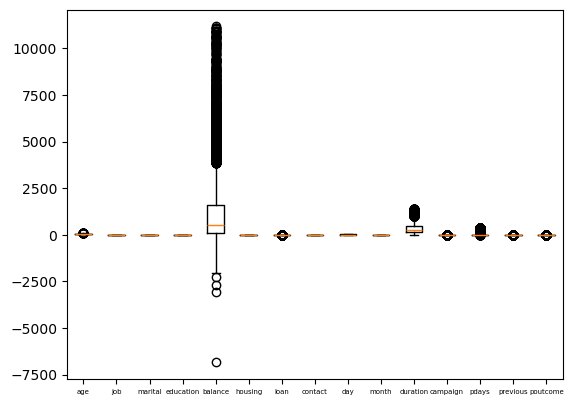

In [398]:
import matplotlib.pyplot as plt
import seaborn as sn

#When dealing with very large data-sets/working with others using graphs to see things would be beneficial to everyone's sanity
fig, ax = plt.subplots()
ax.boxplot(X)
ax.set_xticklabels(X.columns, size=5)

(array([[0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0098e+04, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0098e+04, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0098e+04, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0098e+04, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 1.1000e+01, 4.2480e+03, 3.9270e+03,
         1.0820e+03, 4.4000e+02, 1.9800e+02, 1.2300e+02, 6.8000e+01],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0098e+04, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0098e+04, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000

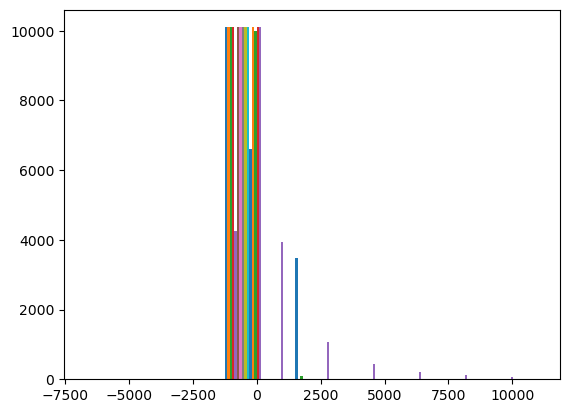

In [400]:
plt.hist(X)

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='job', ylabel='age'>,
        <Axes: xlabel='marital', ylabel='age'>,
        <Axes: xlabel='education', ylabel='age'>,
        <Axes: xlabel='balance', ylabel='age'>,
        <Axes: xlabel='housing', ylabel='age'>,
        <Axes: xlabel='loan', ylabel='age'>,
        <Axes: xlabel='contact', ylabel='age'>,
        <Axes: xlabel='day', ylabel='age'>,
        <Axes: xlabel='month', ylabel='age'>,
        <Axes: xlabel='duration', ylabel='age'>,
        <Axes: xlabel='campaign', ylabel='age'>,
        <Axes: xlabel='pdays', ylabel='age'>,
        <Axes: xlabel='previous', ylabel='age'>,
        <Axes: xlabel='poutcome', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='job'>,
        <Axes: xlabel='job', ylabel='job'>,
        <Axes: xlabel='marital', ylabel='job'>,
        <Axes: xlabel='education', ylabel='job'>,
        <Axes: xlabel='balance', ylabel='job'>,
        <Axes: xlabel='housing', ylabel='job'>,
        <A

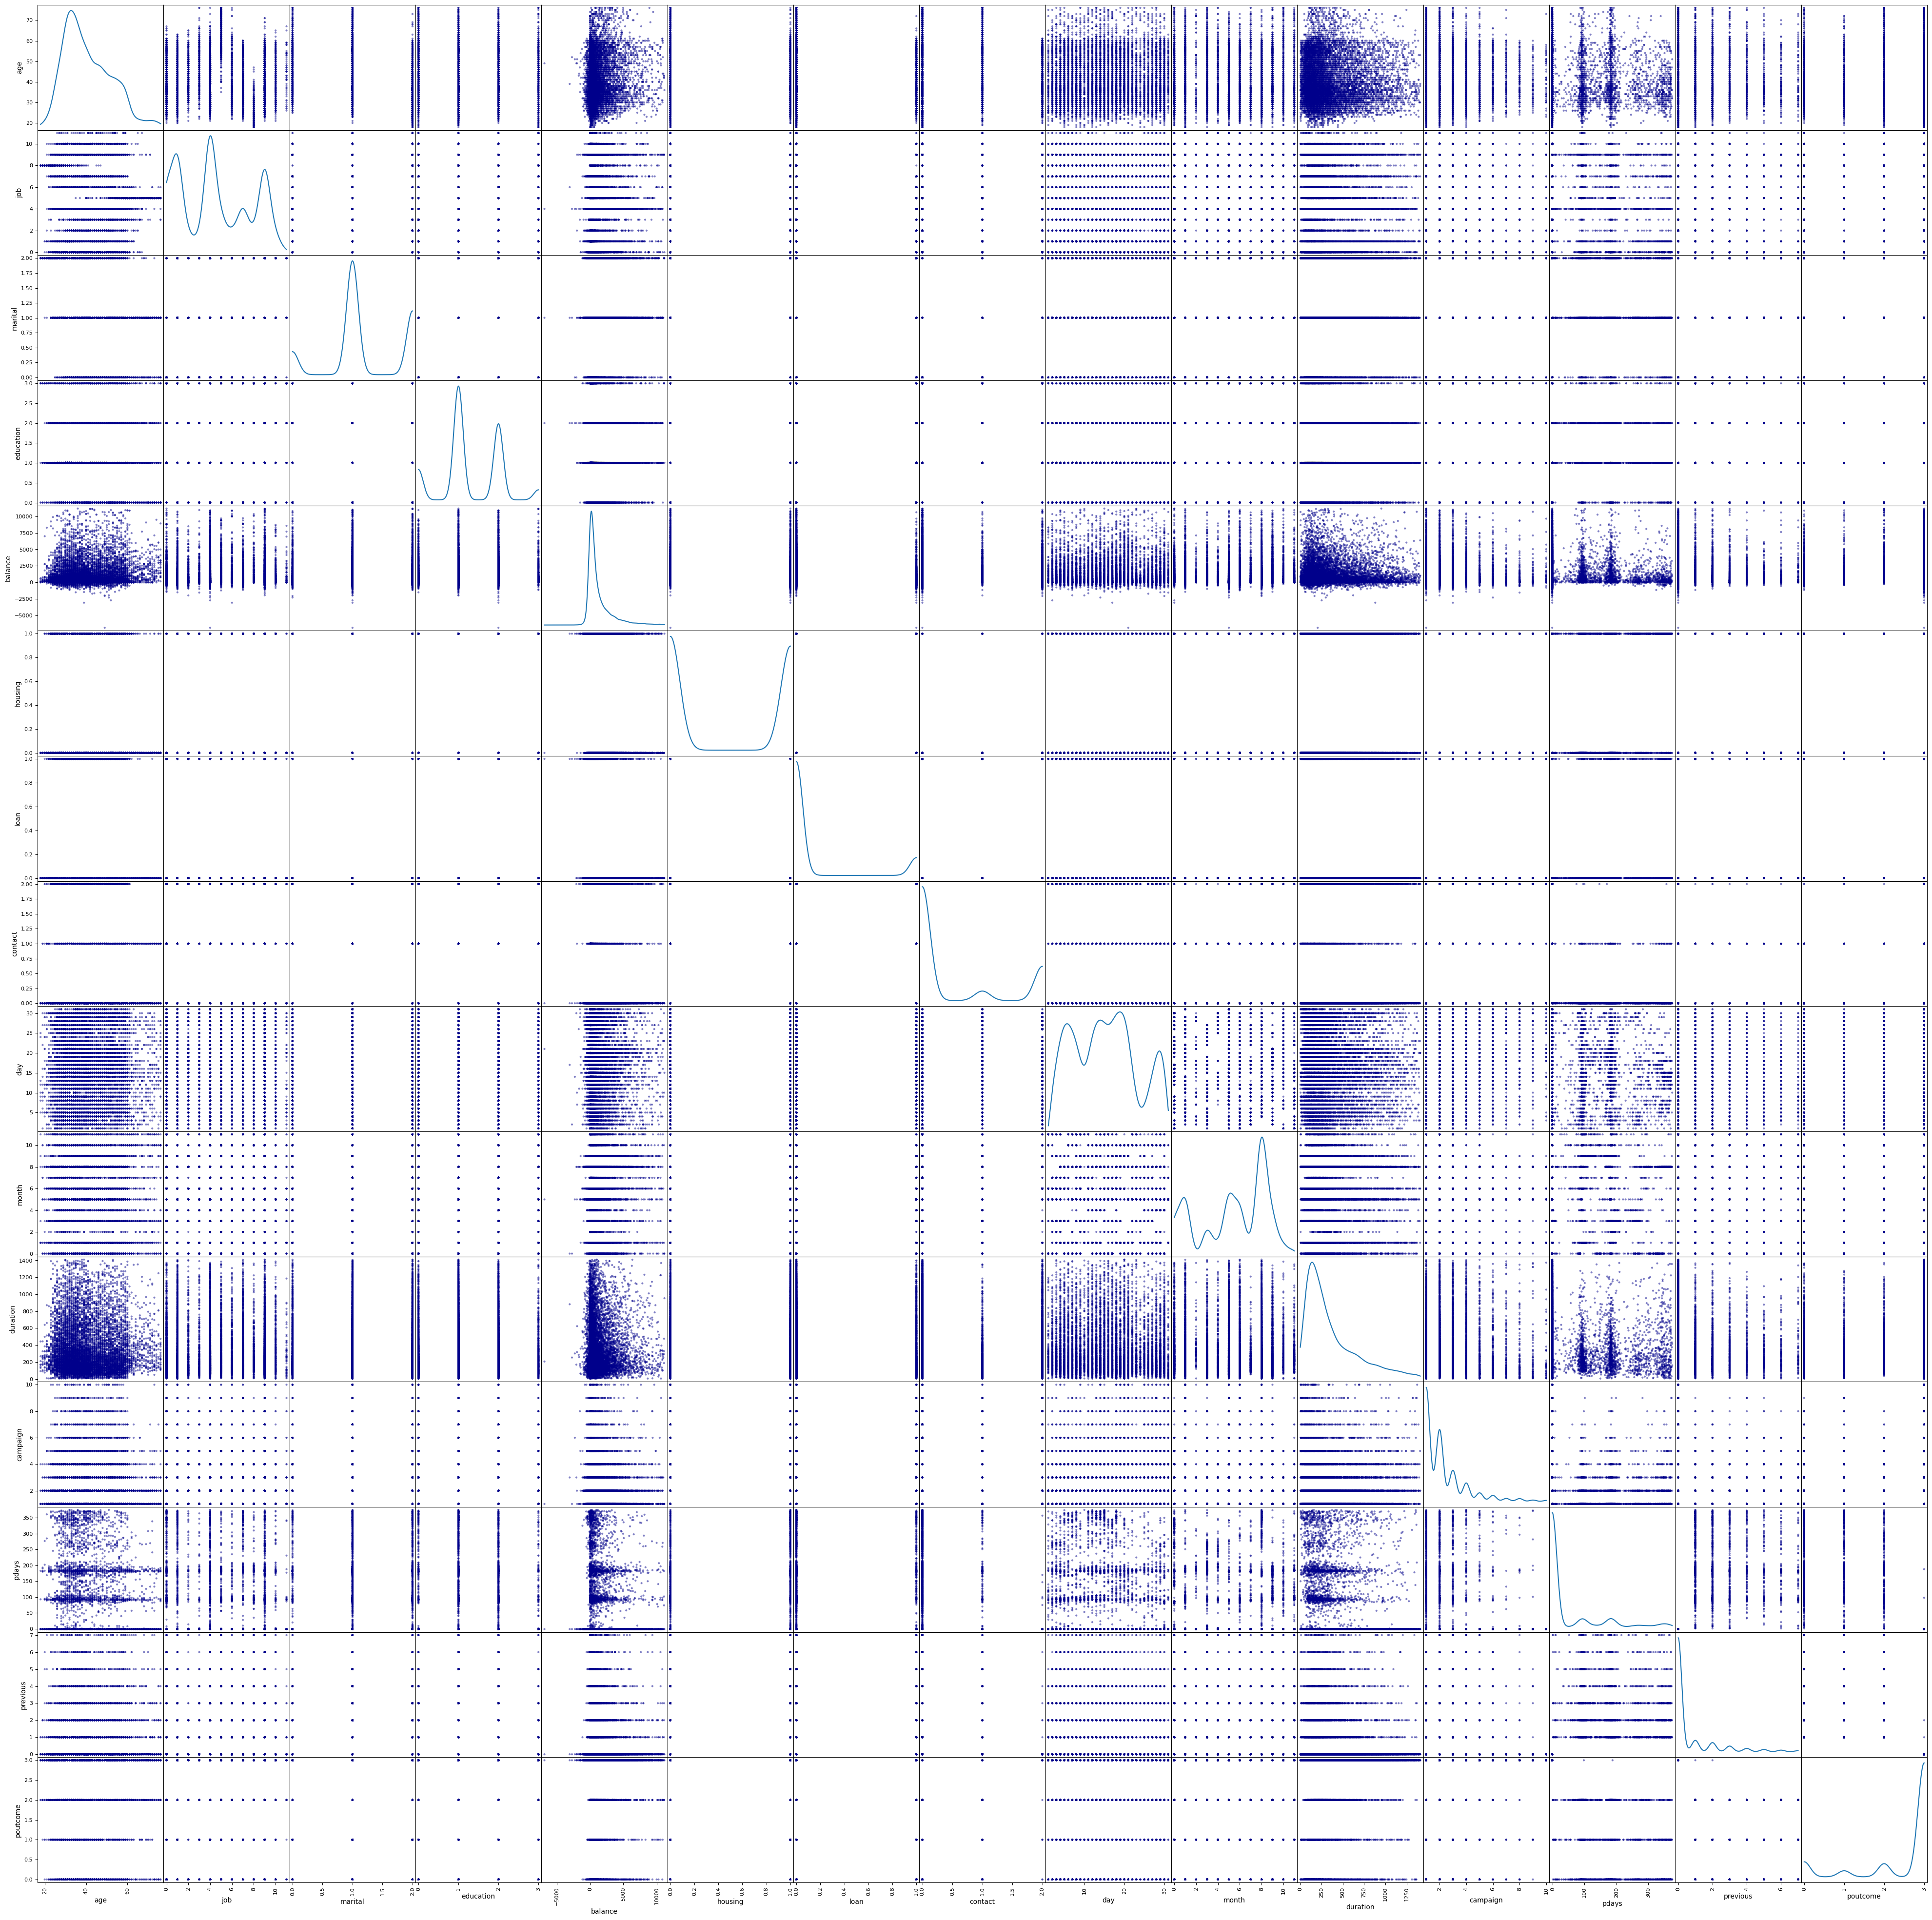

In [66]:
from pandas.plotting import scatter_matrix

scatter_matrix(X, alpha = 0.5, figsize = (50, 50), diagonal = "kde", c="#00008B")

## Fine-Tuning ##

In [402]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

#Define the function to optimize using cross-validation
def dtree_cv(max_depth, min_samples_split, min_samples_leaf):
    #Define the model with the parameters to be optimized
    estimator = RandomForestRegressor(
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        random_state=2
    )
    cval = cross_val_score(estimator, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    return cval.mean() #The optimizer tries to maximize the function, so we negate the score to minimize it

#Define the parameter bounds
param_bounds = {
    'max_depth': (1, 20),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20)
}

optimizer = BayesianOptimization(
    f=dtree_cv,
    pbounds=param_bounds,
    random_state=1,
)

optimizer.maximize(n_iter=100, init_points=6) #Bayesian optimization
best_params_bayes = optimizer.max['params']
best_params_bayes['max_depth'] = int(best_params_bayes['max_depth'])
best_params_bayes['min_samples_split'] = int(best_params_bayes['min_samples_split'])
best_params_bayes['min_samples_leaf'] = int(best_params_bayes['min_samples_leaf'])
best_score_bayes = optimizer.max['target']

print(f"Best Parameters (Bayesian Optimization): {best_params_bayes}")
print(f"Best Score (Bayesian Optimization): {best_score_bayes}")

|   iter    |  target   | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------
| 1         | -0.1254   | 8.923     | 14.69     | 2.002     |
| 2         | -0.1311   | 6.744     | 3.788     | 3.662     |
| 3         | -0.1438   | 4.539     | 7.566     | 9.142     |
| 4         | -0.1206   | 11.24     | 8.965     | 14.33     |
| 5         | -0.1444   | 4.885     | 17.68     | 2.493     |
| 6         | -0.1199   | 13.74     | 8.929     | 12.06     |
| 7         | -0.1192   | 14.48     | 7.427     | 15.12     |
| 8         | -0.1208   | 15.55     | 12.38     | 15.89     |
| 9         | -0.1205   | 15.86     | 11.96     | 2.507     |
| 10        | -0.1226   | 19.18     | 17.38     | 7.667     |
| 11        | -0.1184   | 19.93     | 3.08      | 7.095     |
| 12        | -0.1182   | 19.92     | 1.322     | 14.94     |
| 13        | -0.1188   | 12.01     | 1.33      | 19.85     |
| 14        | -0.1233   | 20.0      | 19.92     | 19.66     |
| 15    

In [408]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

#Define the function to optimize using cross-validation
def dtree_cv(max_depth, min_samples_split, min_samples_leaf):
    #Define the model with the parameters to be optimized
    estimator = DecisionTreeClassifier(
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        random_state=2
    )
    cval = cross_val_score(estimator, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    return cval.mean() #The optimizer tries to maximize the function, so we negate the score to minimize it

#Define the parameter bounds
param_bounds = {
    'max_depth': (1, 20),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20)
}

optimizer = BayesianOptimization(
    f=dtree_cv,
    pbounds=param_bounds,
    random_state=1,
)

optimizer.maximize(n_iter=100, init_points=6) #Bayesian optimization
best_params_bayes = optimizer.max['params']
best_params_bayes['max_depth'] = int(best_params_bayes['max_depth'])
best_params_bayes['min_samples_split'] = int(best_params_bayes['min_samples_split'])
best_params_bayes['min_samples_leaf'] = int(best_params_bayes['min_samples_leaf'])
best_score_bayes = optimizer.max['target']

print(f"Best Parameters (Bayesian Optimization): {best_params_bayes}")
print(f"Best Score (Bayesian Optimization): {best_score_bayes}")

|   iter    |  target   | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------
| 1         | -0.1977   | 8.923     | 14.69     | 2.002     |
| 2         | -0.2119   | 6.744     | 3.788     | 3.662     |
| 3         | -0.2189   | 4.539     | 7.566     | 9.142     |
| 4         | -0.2121   | 11.24     | 8.965     | 14.33     |
| 5         | -0.2196   | 4.885     | 17.68     | 2.493     |
| 6         | -0.219    | 13.74     | 8.929     | 12.06     |
| 7         | -0.1979   | 9.28      | 14.63     | 2.255     |
| 8         | -0.195    | 8.387     | 11.45     | 2.261     |
| 9         | -0.2056   | 12.04     | 10.56     | 2.415     |
| 10        | -0.2192   | 4.976     | 9.194     | 2.067     |
| 11        | -0.1945   | 8.245     | 13.12     | 4.646     |
| 12        | -0.1958   | 9.929     | 15.2      | 7.976     |
| 13        | -0.1967   | 12.91     | 18.2      | 8.204     |
| 14        | -0.1964   | 9.458     | 18.66     | 11.78     |
| 15    

In [424]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

kf = KFold(n_splits=100, shuffle=True, random_state=42)
parameter = {'n_neighbors': np.arange(2, 30, 1)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid = parameter, cv = kf, verbose = 1)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)

Fitting 100 folds for each of 28 candidates, totalling 2800 fits
{'n_neighbors': 18}


## Training and Testing ##

In [432]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

#model1 = RandomForestClassifier(max_depth = 16, min_samples_leaf = 2, min_samples_split = 18).fit(X_train, y_train)
model1 = RandomForestClassifier(n_estimators = 100, random_state=42).fit(X_train, y_train)

predictions = model1.predict(X_test)
score = accuracy_score(y_test, predictions)
print(f"Accuracy: {score}")

#Save Model
if score >= 0.8:
    joblib.dump(model1, "Marketing.joblib")
    model = joblib.load("Marketing.joblib")

Accuracy: 0.8452145214521453


In [410]:
from sklearn.tree import DecisionTreeClassifier
import joblib

model2 = DecisionTreeClassifier(max_depth = 15, min_samples_leaf = 19, min_samples_split = 19).fit(X_train, y_train)

predictions = model2.predict(X_test)
score = accuracy_score(y_test, predictions)
print(f"Accuracy: {score}")

#Save Model
if score >= 0.8:
    joblib.dump(model2, ".joblib")
    model = joblib.load(".joblib")

Accuracy: 0.8382838283828383


In [426]:
from sklearn.neighbors import KNeighborsClassifier
import joblib

model3 = KNeighborsClassifier(n_neighbors=18).fit(X_train, y_train)

score = model3.score(X_test, y_test)
print(f"Accuracy: {score}")

#Save Model
if score >= 0.8:
    joblib.dump(model3, ".joblib")
    model = joblib.load(".joblib")

Accuracy: 0.7653465346534654


In [428]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
import joblib

linreg = LinearRegression()

param_space = {'copy_X': [True,False], 'fit_intercept': [True,False], 
               'n_jobs': [1,5,10,15,None], 'positive': [True,False]}

model4 = GridSearchCV(linreg, param_space, cv=10).fit(X_train, y_train)

predictions = np.array(model4.predict(X_test))
score = model4.score(X_test, y_test)
print(f"Accuracy: {score}")

#Save Model
if score >= 0.8:
    joblib.dump(model4, ".joblib")
    model = joblib.load(".joblib")

Accuracy: 0.3830314577499132


In [430]:
from sklearn import svm
import joblib

model5 = svm.SVC().fit(X_train, y_train)

predictions = model5.predict(X_test)
score = accuracy_score(y_test, predictions)
print(f"Accuracy: {score}")

#Save Model
if score >= 0.8:
    joblib.dump(model5, ".joblib")
    model = joblib.load(".joblib")

Accuracy: 0.7382838283828382


## Predicted vs Actual ##

In [434]:
y_predicted = model.predict(X_test)

In [436]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[1359,  266],
       [ 203, 1202]])

Text(95.72222222222221, 0.5, 'Actual')

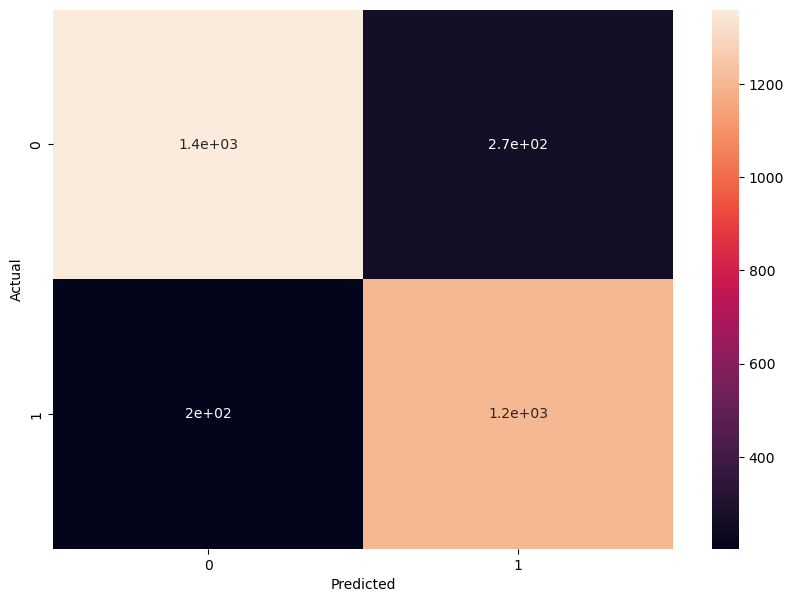

In [438]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [492]:
prob1 = model.predict_proba(X)[:, 1] #Probability of A doing y (1) in the future
prob1

array([0.62, 0.84, 0.82, ..., 0.01, 0.13, 0.83])

In [576]:
prob2 = model.predict_proba(X[:10098]) #Probability of A doing y (0 or 1) in the future
prob2

array([[0.38, 0.62],
       [0.16, 0.84],
       [0.18, 0.82],
       ...,
       [0.99, 0.01],
       [0.87, 0.13],
       [0.17, 0.83]])

(array([3372.,  948.,  682.,  243.,  171.,  209.,  398.,  597., 1339.,
        2139.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

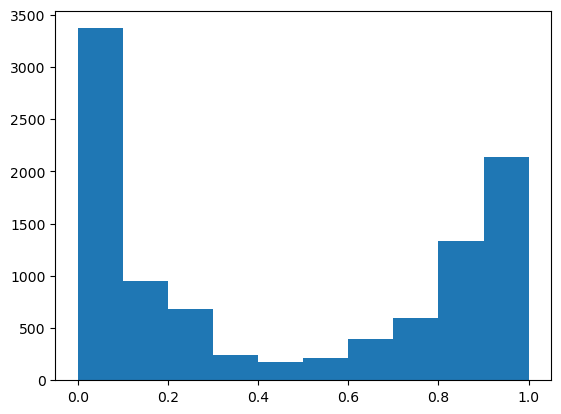

In [500]:
plt.hist(prob1)

(array([[1921., 1468.,  736.,  348.,  195.,  185.,  293.,  553.,  888.,
         3511.],
        [3372.,  948.,  682.,  243.,  171.,  209.,  398.,  597., 1339.,
         2139.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 BarContainer objects>)

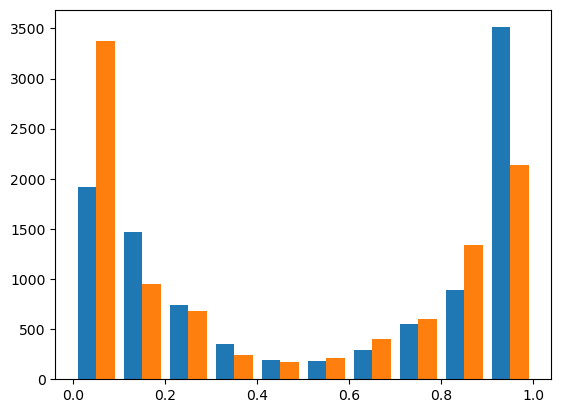

In [580]:
plt.hist(prob2)